In [55]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs.git

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [56]:
ls german-traffic-signs

signnames.csv  test.p  train.p  valid.p


In [57]:
cat german-traffic-signs/signnames.csv

ClassId,SignName
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)
9,No passing
10,No passing for vechiles over 3.5 metric tons
11,Right-of-way at the next intersection
12,Priority road
13,Yield
14,Stop
15,No vechiles
16,Vechiles over 3.5 metric tons prohibited
17,No entry
18,General caution
19,Dangerous curve to the left
20,Dangerous curve to the right
21,Double curve
22,Bumpy road
23,Slippery road
24,Road narrows on the right
25,Road work
26,Traffic signals
27,Pedestrians
28,Children crossing
29,Bicycles crossing
30,Beware of ice/snow
31,Wild animals crossing
32,End of all speed and passing limits
33,Turn right ahead
34,Turn left ahead
35,Ahead only
36,Go straight or right
37,Go straight or left
38,Keep right
39,Keep left
40,Roundabout mandatory
41,End of no passing
42,End of no passing by vechiles over 3.5 metric tons


In [58]:
tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import cv2
import pandas as pd
import random
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
np.random.seed(0)

In [0]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)

In [62]:
print(type(train_data))

<class 'dict'>


In [63]:
for key in train_data:
  print(key)

coords
labels
features
sizes


In [0]:
X_train,y_train = train_data['features'],train_data['labels']
X_val,y_val = val_data['features'],val_data['labels']
X_test,y_test = test_data['features'],test_data['labels']

In [65]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "number of images not equal to number of label"
assert(X_val.shape[0] == y_val.shape[0]), "number of images not equal to number of label"
assert(X_test.shape[0] == y_test.shape[0]), "number of images not equal to number of label"
assert(X_train.shape[1:] == (32,32,3)), "dimension of image is not 32x32x3"
assert(X_test.shape[1:] == (32,32,3)), "dimension of image is not 32x32x3"
assert(X_val.shape[1:] == (32,32,3)), "dimension of image is not 32x32x3"

In [0]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

In [68]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210
180
1980
2010
1260
1770
1650
360
1290
1260
1320
1800
1170
1890
1920
690
540
360
990
1080
180
300
270
330
450
240
1350
540
210
480
240
390
690
210
599
360
1080
330
180
1860
270
300
210
210


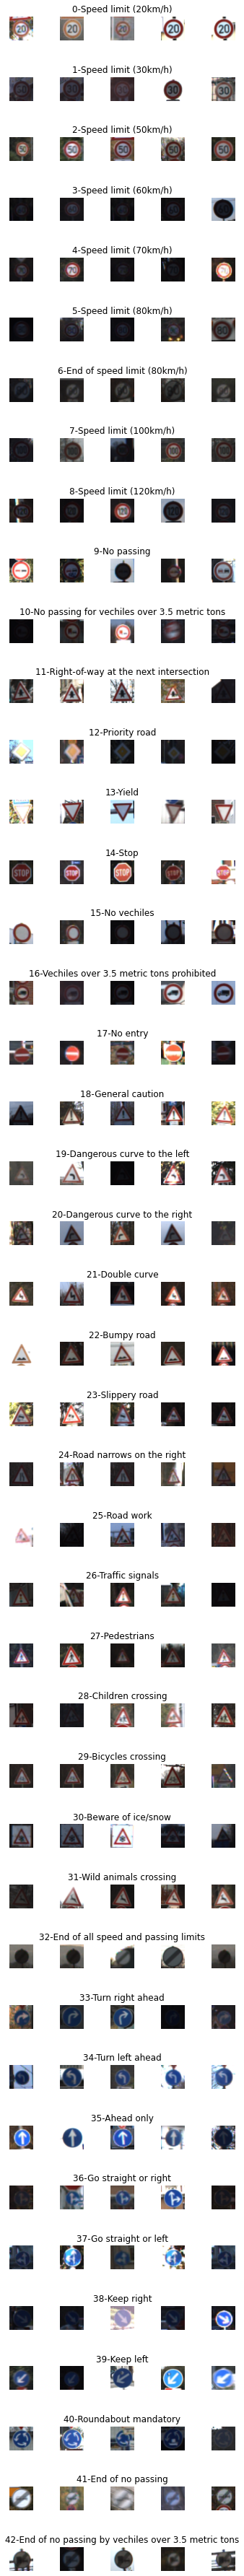

In [69]:
num_of_samples = []
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 50))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        print(len(x_selected))
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j)+"-"+row['SignName'])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

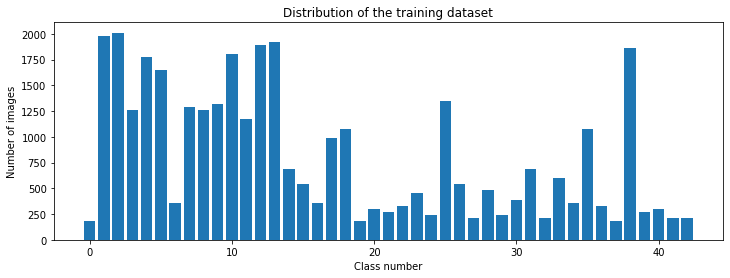

In [70]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(34799, 32, 32, 3)
36


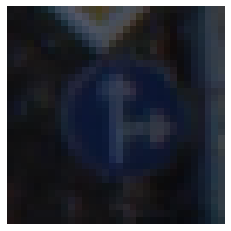

In [71]:
oimg = plt.imshow(X_train[1000])
plt.axis("off")
print(X_train.shape)
print(y_train[1000])

In [0]:
def grayscale(img):
  dimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return dimg

(32, 32)


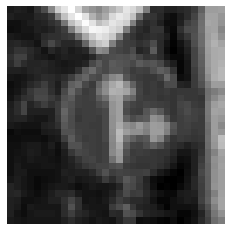

In [73]:
gimg = grayscale(X_train[1000])
plt.imshow(gimg, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(gimg.shape)

In [0]:
def equilise(img):
  eimg = cv2.equalizeHist(img)
  return eimg

(32, 32)


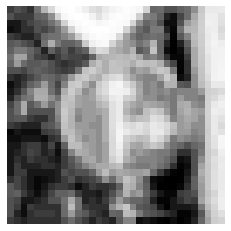

In [75]:
eimg = equilise(gimg)
plt.imshow(eimg, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(gimg.shape)

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equilise(img)
  img = img/255
  return img

(32, 32)
[[0.23921569 0.32156863 0.27058824 ... 0.91372549 0.91372549 0.92156863]
 [0.32156863 0.23921569 0.23921569 ... 0.93333333 0.93333333 0.88627451]
 [0.09019608 0.09019608 0.19215686 ... 0.94117647 0.93333333 0.87843137]
 ...
 [0.32156863 0.23921569 0.05098039 ... 0.7372549  0.83529412 0.93333333]
 [0.32156863 0.13333333 0.05098039 ... 0.68235294 0.81960784 0.8745098 ]
 [0.23921569 0.19215686 0.13333333 ... 0.63921569 0.80392157 0.82745098]]


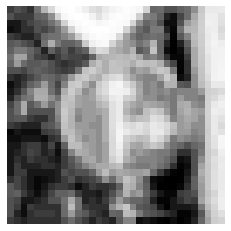

In [77]:
img = preprocessing(X_train[1000])
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.axis("off")
print(gimg.shape)
print(img)

In [0]:
X_train  = np.array(list(map(preprocessing, X_train)))
X_val  = np.array(list(map(preprocessing, X_val)))
X_test  = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


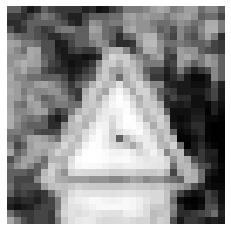

In [79]:
plt.imshow(X_train[random.randint(1,1000)], cmap=plt.get_cmap('gray'))
plt.axis("off")
print(X_train.shape)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32)
(12630, 32, 32)
(4410, 32, 32)


In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [0]:
y_train = to_categorical(y_train,43)
y_val = to_categorical(y_val,43)
y_test = to_categorical(y_test,43)

In [0]:
def lenet_model():
  model = Sequential()
  model.add(Conv2D(filters=60, kernel_size=(5,5), input_shape=(32,32,1), activation='relu'))
  model.add(Conv2D(filters=60, kernel_size=(5,5), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
  model.add(Conv2D(filters=30, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(0.001), loss= 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [0]:
model = lenet_model()

In [86]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 4, 4, 30)         

In [87]:
h = model.fit(X_train,y_train, epochs=10, validation_data=(X_val,y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 2s 62us/step - loss: 2.0509 - acc: 0.4418 - val_loss: 0.5959 - val_acc: 0.8336
Epoch 2/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.5250 - acc: 0.8372 - val_loss: 0.2812 - val_acc: 0.9156
Epoch 3/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.3003 - acc: 0.9073 - val_loss: 0.1998 - val_acc: 0.9426
Epoch 4/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.2145 - acc: 0.9325 - val_loss: 0.1597 - val_acc: 0.9596
Epoch 5/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.1712 - acc: 0.9476 - val_loss: 0.1346 - val_acc: 0.9605
Epoch 6/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.1380 - acc: 0.9563 - val_loss: 0.1028 - val_acc: 0.9683
Epoch 7/10
34799/34799 [==============================] - 2s 48us/step - loss: 0.1191 - acc: 0.9630 - val_loss: 0.1191 - val_acc:

Text(0.5, 0, 'epochs')

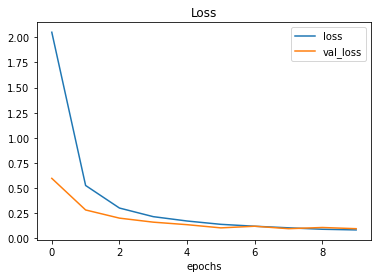

In [88]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

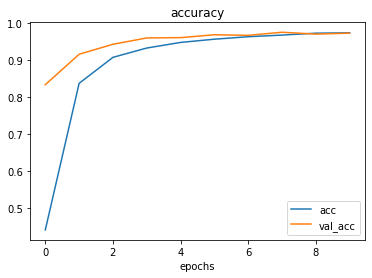

In [89]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('accuracy')
plt.xlabel('epochs')

In [90]:
score = model.evaluate(X_test,y_test, verbose = 0)
print("test_score",score[0])
print("test_accuracy",score[1])

test_score 0.16195471316328242
test_accuracy 0.9559778305810308


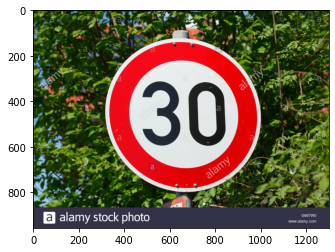

In [91]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


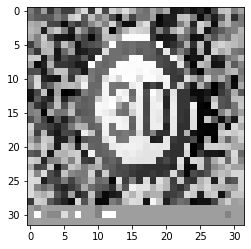

In [92]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)

In [94]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [1]


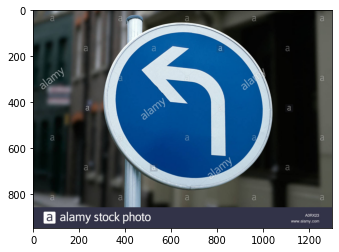

In [95]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


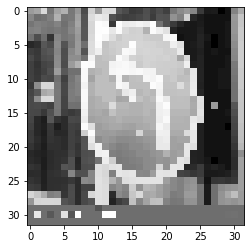

In [96]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [0]:
img = img.reshape(1, 32, 32, 1)

In [98]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [12]


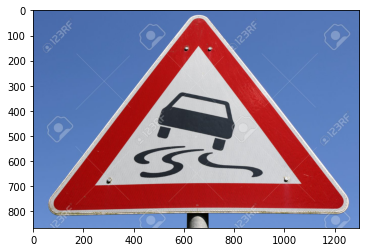

In [99]:
#https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg
import requests
from PIL import Image
url = 'https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
predicted sign: [23]


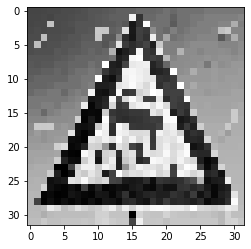

In [100]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

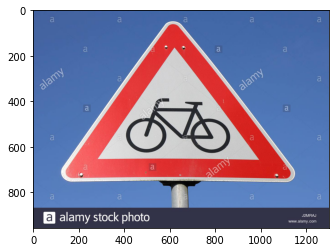

In [101]:
#https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
predicted sign: [31]


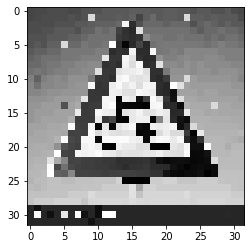

In [102]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
img = img.reshape(1, 32, 32, 1)
print("predicted sign: "+ str(model.predict_classes(img)))

In [0]:
data_gen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)

In [0]:
data_gen.fit(X_train)

In [0]:
batches = data_gen.flow(X_train,y_train, batch_size=20)
X_batch, y_batch = next(batches)
plt.subplot()